In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\DT\winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.describe()                                                           

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


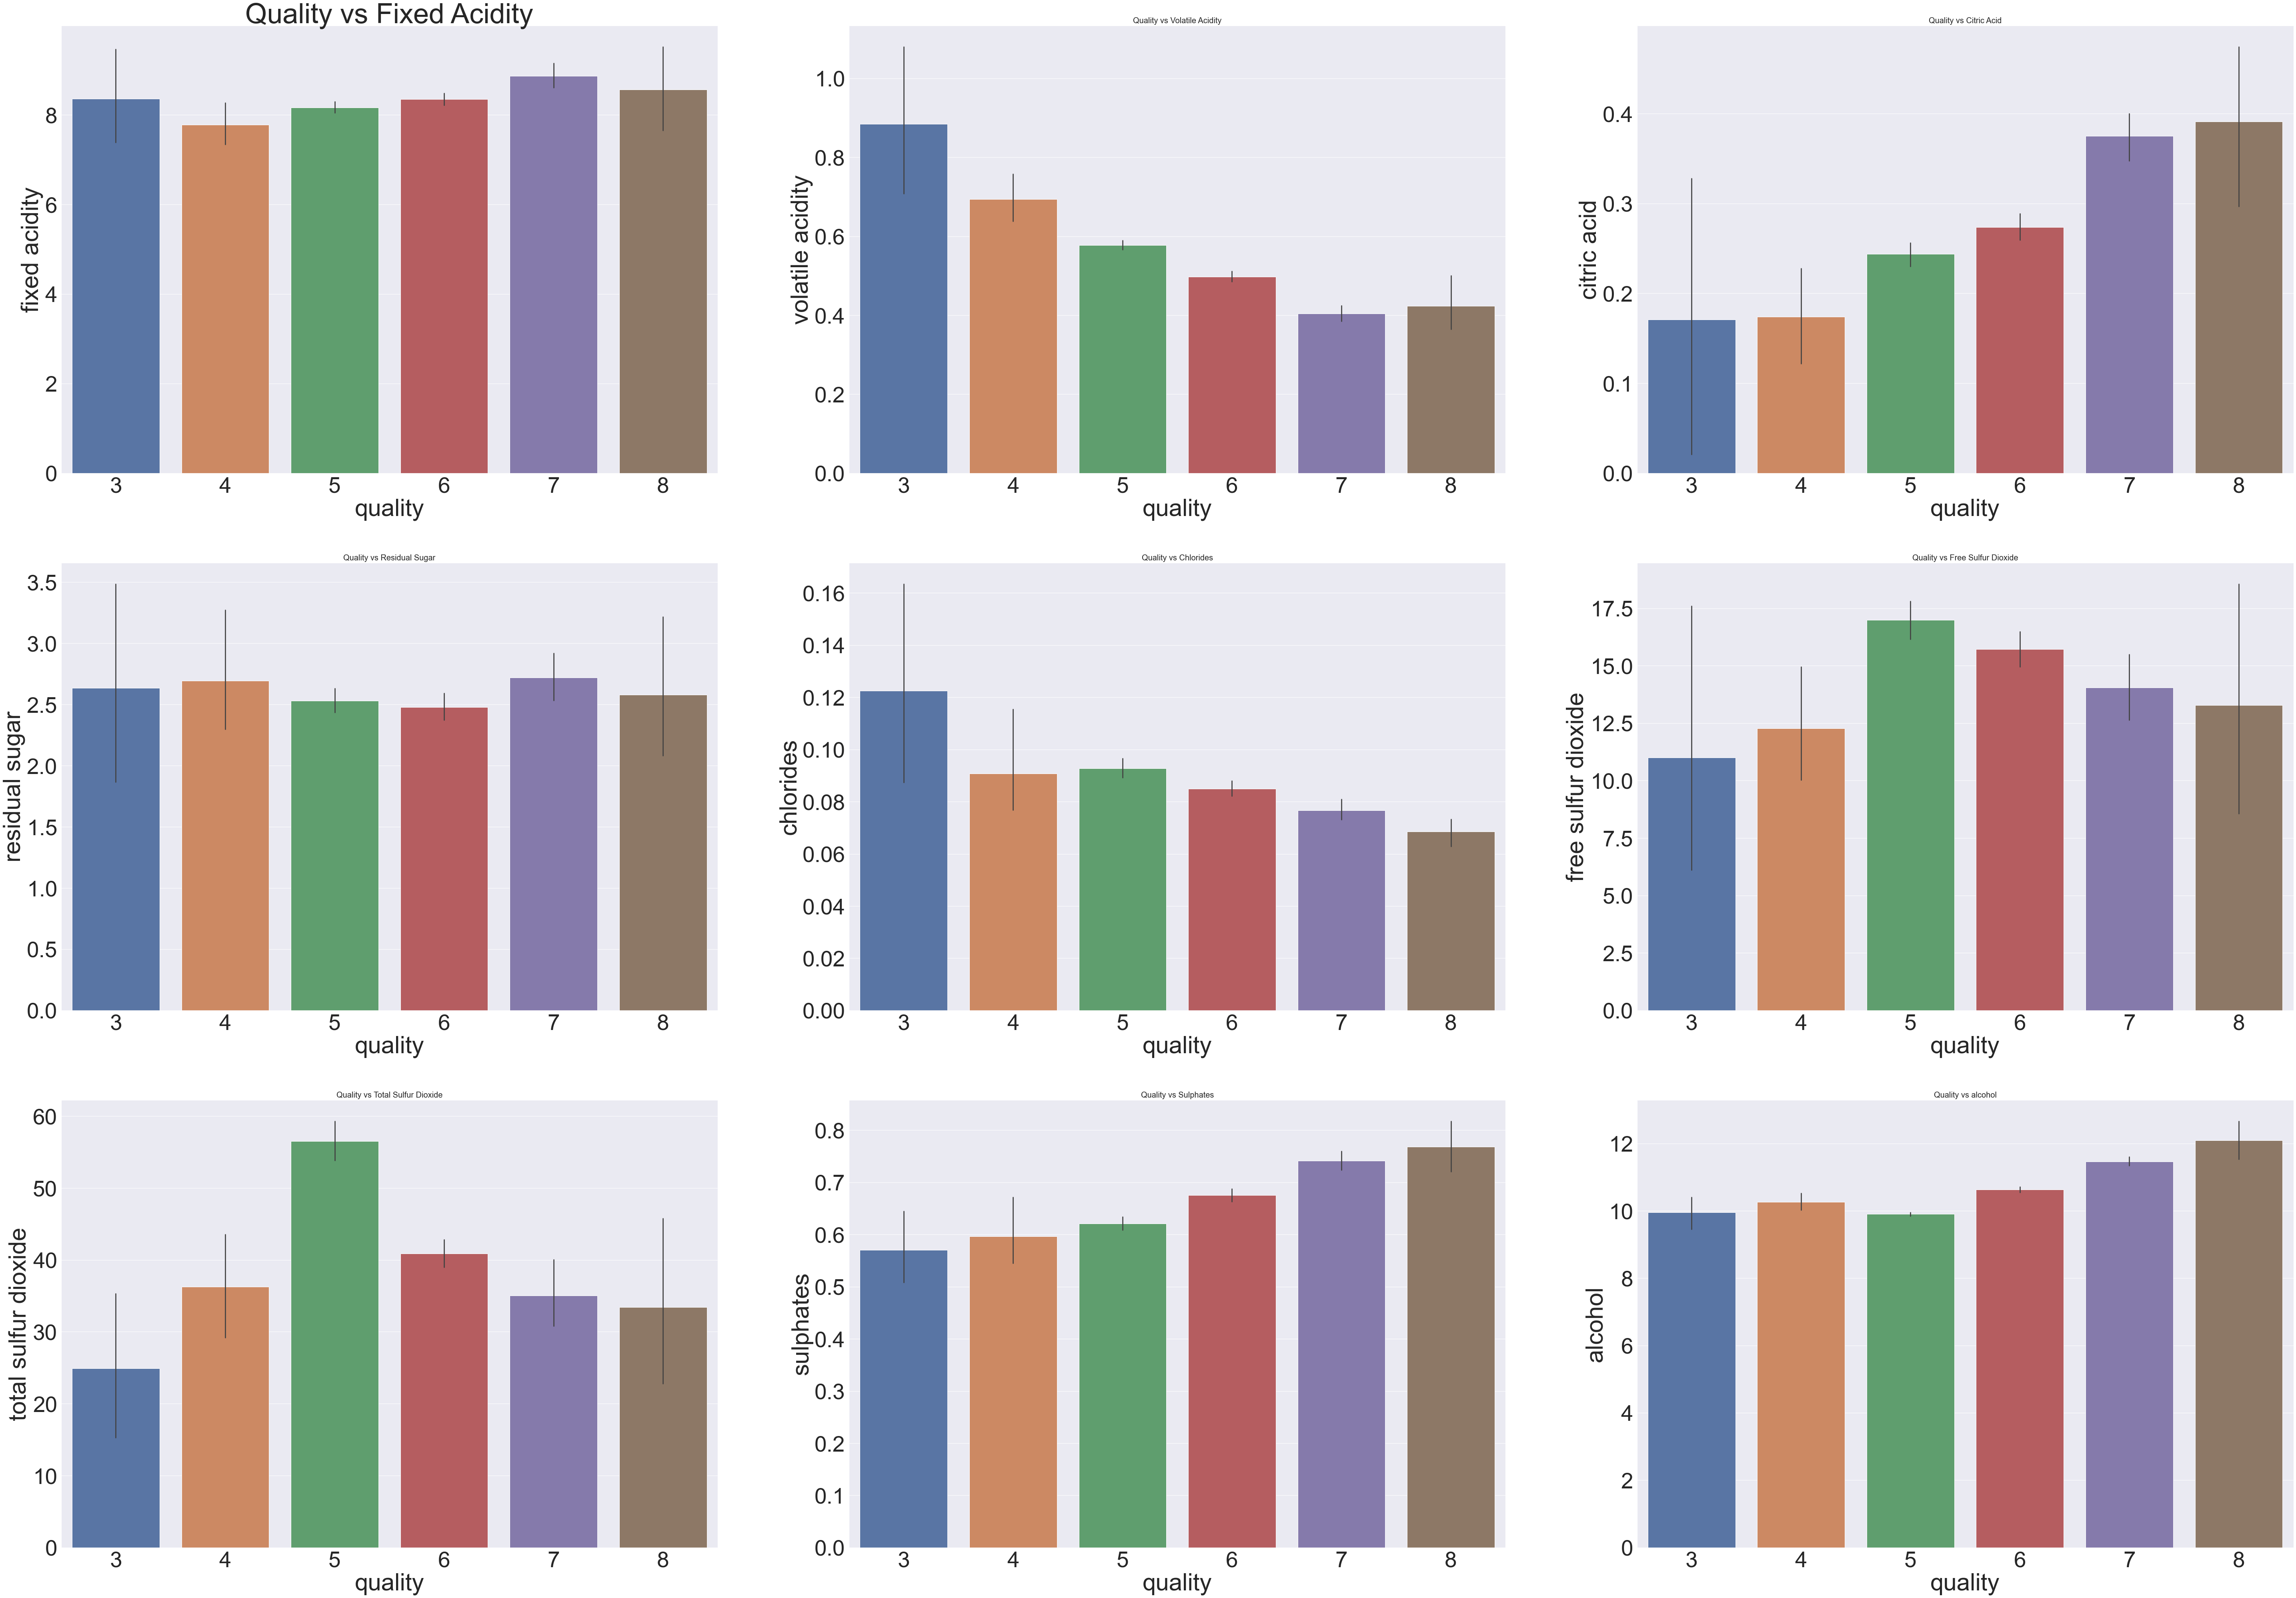

In [17]:
plt.figure(figsize =(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x='quality', y ='fixed acidity', data =df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=20)
sns.barplot(x='quality', y ='volatile acidity', data =df)

plt.subplot(333)
plt.title("Quality vs Citric Acid",fontsize=20)
sns.barplot(x='quality', y ='citric acid', data =df)

plt.subplot(334)
plt.title("Quality vs Residual Sugar",fontsize=20)
sns.barplot(x='quality', y ='residual sugar', data =df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=20)
sns.barplot(x='quality', y ='chlorides', data =df)

plt.subplot(336)
plt.title("Quality vs Free Sulfur Dioxide",fontsize=20)
sns.barplot(x='quality', y ='free sulfur dioxide', data =df)

plt.subplot(337)
plt.title("Quality vs Total Sulfur Dioxide",fontsize=20)
sns.barplot(x='quality', y ='total sulfur dioxide', data =df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=20)
sns.barplot(x='quality', y ='sulphates', data =df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=20)
sns.barplot(x='quality', y ='alcohol', data =df)






In [18]:
bins =(2,6.5,8)
classes =['bad','good']
df['quality'] =pd.cut(df['quality'],bins =bins, labels =classes)

In [19]:
label_quality = LabelEncoder()

In [20]:
df['quality'] =label_quality.fit_transform(df['quality'])

In [21]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

# So 0 indicates bad and 1 indicates good

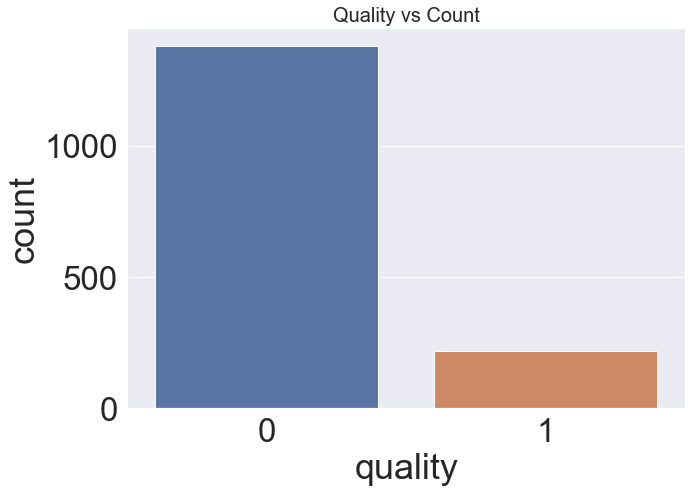

In [31]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title('Quality vs Count',fontsize=20)
sns.countplot(df['quality'])

In [32]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [33]:
x =df.drop('quality',axis =1)
y=df['quality']

In [34]:
x_train, x_test,y_train,y_test =train_test_split(x,y,test_size =0.2,random_state=21)

In [35]:
sc =StandardScaler()

In [37]:
x_train =sc.fit_transform(x_train)
x_test =sc.fit_transform(x_test)

# Random Forest Classifier

In [39]:
RF =RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)

In [40]:
pred1= accuracy_score(y_test,pred_RF)
print(pred1+100)

100.903125


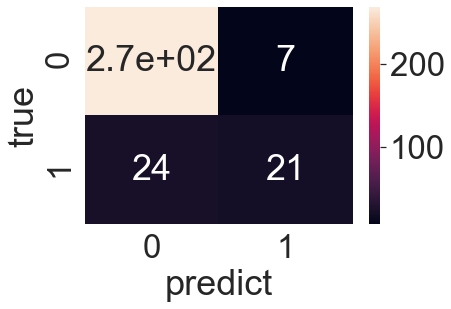

In [43]:
cm1=confusion_matrix(y_test,pred_RF)
ax1 = sns.heatmap(cm1,annot=True)
ax1.set(xlabel ="predict",ylabel='true')
plt.show()